In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pyreadr

In [2]:
# Carregar o arquivo RData
result = pyreadr.read_r('salarios.RData')

# Extrair o DataFrame
df_salarios = result['salarios']

# Agora, df é um DataFrame do pandas
print(df_salarios.head())

       nome      salario  rh1  econometria1  rh2  econometria2   rh3  \
0  Patricia  2525.340820  9.0          4.50  9.0          4.50   3.0   
1      Luiz  2498.574951  8.0          4.00  8.0          4.00   7.0   
2    Dalila  2364.686768  9.5          4.75  9.5          4.75  10.0   
3    Leonor  1981.349854  7.0          3.50  7.0          3.50  10.0   
4    Ovidio  1892.807983  6.0          3.00  6.0          3.10   7.0   

   econometria3  
0           9.0  
1           8.0  
2           9.5  
3           7.0  
4           6.0  


In [3]:
#Características das variáveis do dataset
df_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome          15 non-null     object 
 1   salario       15 non-null     float64
 2   rh1           15 non-null     float64
 3   econometria1  15 non-null     float64
 4   rh2           15 non-null     float64
 5   econometria2  15 non-null     float64
 6   rh3           15 non-null     float64
 7   econometria3  15 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.1+ KB


In [4]:
#Estatísticas univariadas
df_salarios.describe()

,salario,rh1,econometria1,rh2,econometria2,rh3,econometria3
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2032.150578,6.400000,3.200000,6.400000,3.240000,7.180000,6.400000
std,312.507361,2.221647,1.110823,2.221647,1.061367,3.169317,2.221647
min,1505.627563,3.000000,1.500000,3.000000,1.500000,1.400000,3.000000
25%,1870.515320,4.500000,2.250000,4.500000,2.250000,4.450000,4.500000
50%,2001.654297,7.000000,3.500000,7.000000,3.500000,8.000000,7.000000
75%,2219.607788,8.000000,4.000000,8.000000,4.000000,9.950000,8.000000
max,2525.340820,9.500000,4.750000,9.500000,4.750000,10.000000,9.500000


<Axes: >

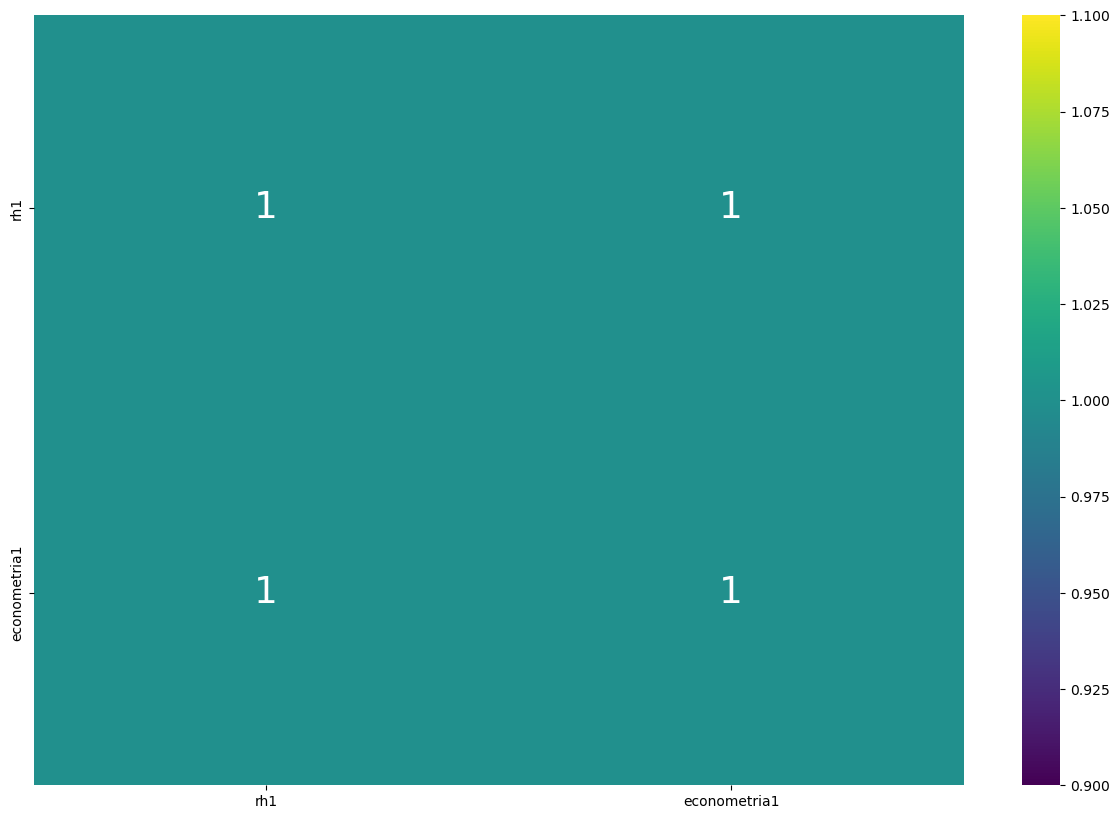

In [5]:
# In[ ]: CORRELAÇÃO PERFEITA:

corr1 = df_salarios[['rh1','econometria1']].corr()
corr1

plt.figure(figsize=(15,10))
sns.heatmap(corr1, annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':27})

In [6]:
# Estimando um modelo com variáveis preditoras com correlação perfeita
modelo_1 = sm.OLS.from_formula('salario ~ rh1 + econometria1',
                               df_salarios).fit()

In [7]:
# Parâmetros do modelo
modelo_1.summary()

C:\Users\carlo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.69e-06
Time:                        19:34:02   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1213.7997    109.752     11.060      0.000     976.696    1450.904
rh1            102.2939     13.007      7.865      0.000      74.194     130.394
econometria1    51.1469      6.504      7.865      0.000      37.097      65.197
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                     2.30e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: >

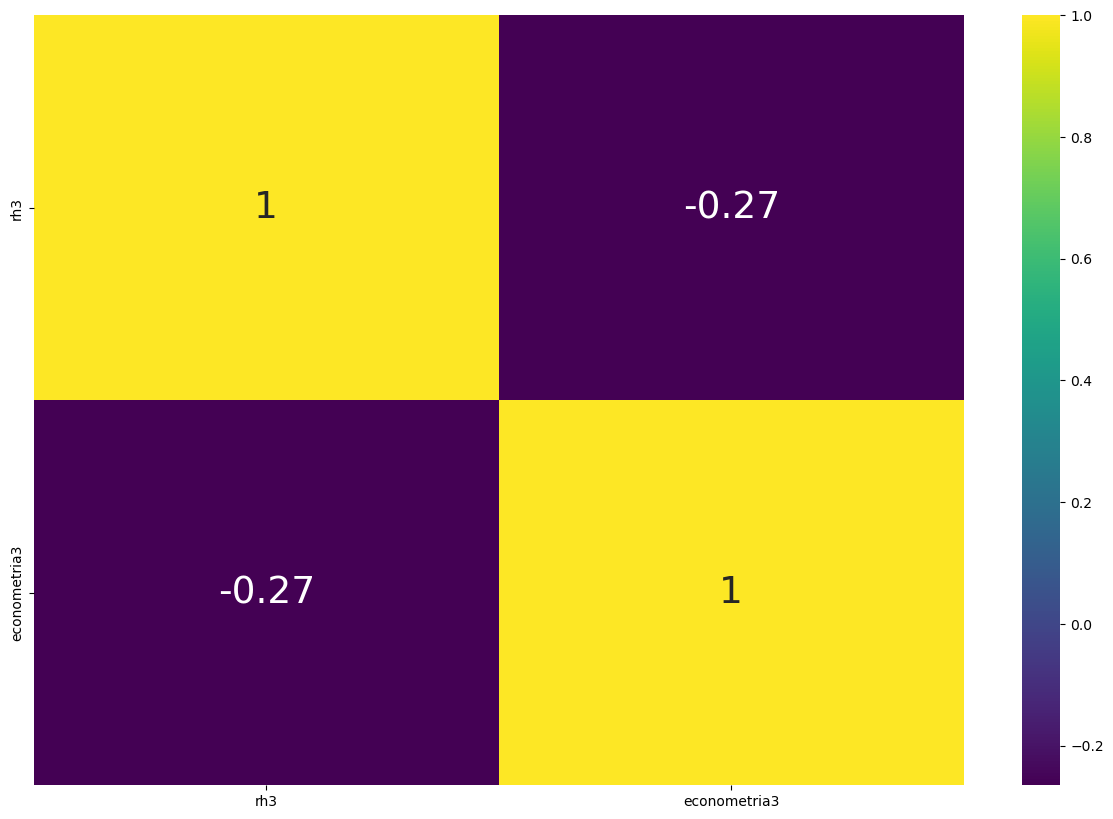

In [8]:
# In[ ]: CORRELAÇÃO BAIXA:

corr3 = df_salarios[['rh3','econometria3']].corr()
corr3

plt.figure(figsize=(15,10))
sns.heatmap(corr3, annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':27})

In [9]:
# Estimando um modelo com variáveis preditoras com correlação baixa
modelo_3 = sm.OLS.from_formula('salario ~ rh3 + econometria3',
                               df_salarios).fit()

In [10]:
# Parâmetros do modelo
modelo_3.summary()

C:\Users\carlo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     28.77
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.64e-05
Time:                        19:34:03   Log-Likelihood:                -93.759
No. Observations:                  15   AIC:                             193.5
Df Residuals:                      12   BIC:                             195.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1246.6172    163.783      7.611      0.000     889.765    1603.469
rh3             -3.4184     12.263     -0.279      0.785     -30.137      23.300
econometria3   126.5746     17.494      7.235      0.000      88.459     164.691
==============================================================================
Omnibus:                        1.817   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.396
Skew:                           0.597   Prob(JB):                        0.498
Kurtosis:                       2.101   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_salarios[['rh3','econometria3']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

,VIF,Tolerance
const,20.465195,0.048863
rh3,1.075576,0.929735
econometria3,1.075576,0.929735


<Axes: >

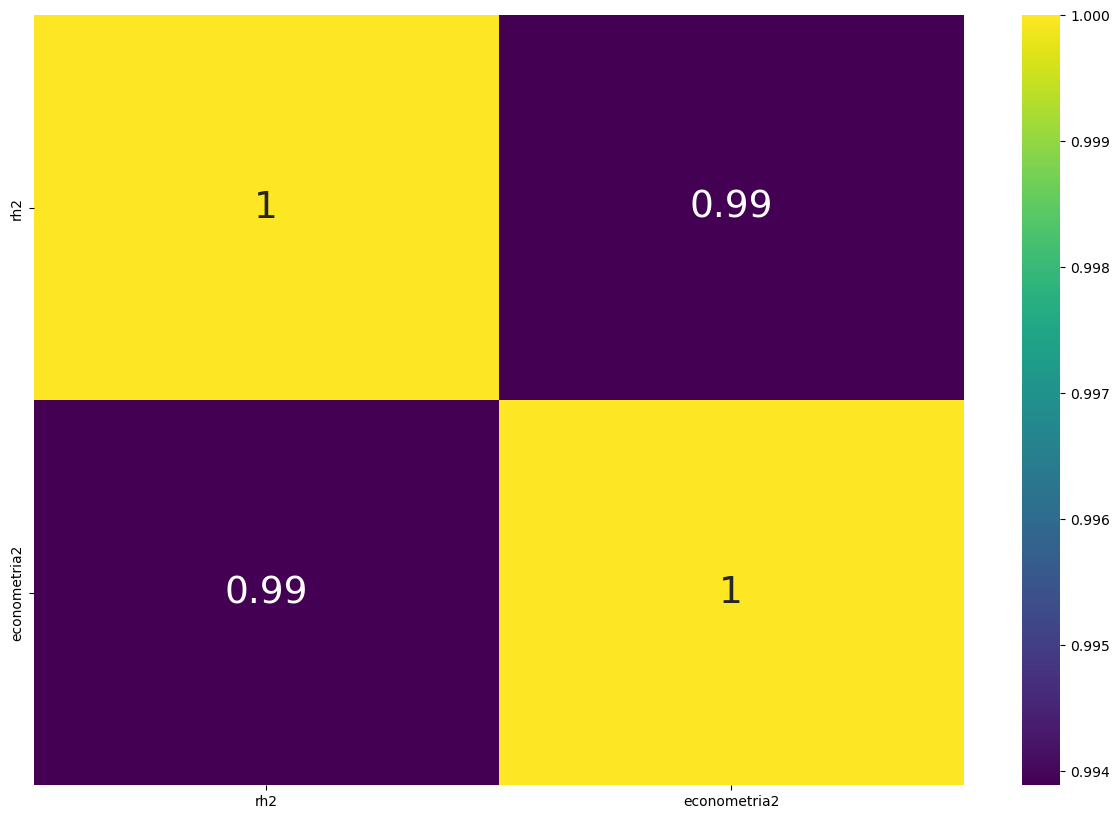

In [12]:
# In[ ]: CORRELAÇÃO MUITO ALTA, PORÉM NÃO PERFEITA:

corr2 = df_salarios[['rh2','econometria2']].corr()
corr2

plt.figure(figsize=(15,10))
sns.heatmap(corr2, annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':27})


In [13]:
# Estimando um modelo com variáveis preditoras com correlação quase perfeita
modelo_2 = sm.OLS.from_formula('salario ~ rh2 + econometria2',
                               df_salarios).fit()


In [14]:
# Parâmetros do modelo
modelo_2.summary()

C:\Users\carlo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     29.10
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.50e-05
Time:                        19:41:58   Log-Likelihood:                -93.688
No. Observations:                  15   AIC:                             193.4
Df Residuals:                      12   BIC:                             195.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1241.8527    130.172      9.540      0.000     958.233    1525.473
rh2            194.0845    152.087      1.276      0.226    -137.285     525.454
econometria2  -139.4577    318.348     -0.438      0.669    -833.079     554.164
==============================================================================
Omnibus:                        1.720   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.309
Skew:                           0.554   Prob(JB):                        0.520
Kurtosis:                       2.068   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

X = df_salarios[['rh2','econometria2']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

,VIF,Tolerance
const,13.049699,0.076630
rh2,82.061458,0.012186
econometria2,82.061458,0.012186
